In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from NilsPodLib import session as sensor
from datetime import datetime, timedelta

In [18]:
plt.close('all')

sensor_id = "3388"
date = "20190406_1358"
folder_path = "../Data/Team_ArneRobert/"
file_name = "NilsPodX-%s_%s.bin" % (sensor_id, date)

utc_offset = 2 * 3600

file_path = folder_path + file_name
file_path

'../Data/Team_ArneRobert/NilsPodX-3388_20190406_1358.bin'

In [19]:
dataset = sensor.Dataset(file_path)
# Dataset.calibrate();

Header Size = 29


Start: 2019-04-06 13:58:14
Stop: 2019-04-06 16:18:22
Sampling Frequency calculated: 204.79531398667936 Hz


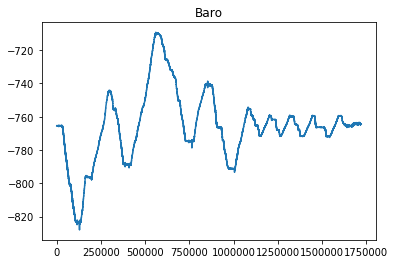

In [20]:
seconds = dataset.header.unix_time_stop - dataset.header.unix_time_start
n = len(dataset.counter)
if seconds > 0:
    print("Start: " + str(dataset.header.datetime_start))
    print("Stop: " + str(dataset.header.datetime_stop))
    print("Sampling Frequency calculated: " + str(1 / (seconds / n)) + " Hz")
else:
    print("Timestamp Error")

if dataset.header.baro_enabled:
    plt.figure()
    plt.plot(-dataset.baro.data[1:])
    plt.title('Baro')

In [23]:
# convert to SI units (according to datasheet)
nilspod_data = pd.DataFrame(dataset.acc.data * 9.80665 / 2048.0, columns=['acc_' + x for x in ['x', 'y', 'z']])
gyro_data = pd.DataFrame(dataset.gyro.data / 16.4, columns=['gyro_' + x for x in ['x', 'y', 'z']])
baro_data = pd.DataFrame(dataset.baro.data, columns=['baro'])

nilspod_data = pd.concat([nilspod_data, gyro_data, baro_data], axis=1)

time_received_ms = np.array(dataset.counter / 204.8 * 1000).astype(int)
nilspod_data.insert(0, 'time_received_ms', time_received_ms)
nilspod_data.insert(0, 'time_received_debug', [datetime.utcfromtimestamp(ts + utc_offset).strftime('%H:%M:%S') for ts in dataset.rtc])

#skip 1st sample and reindex the data
nilspod_data = nilspod_data[1:].reset_index(drop=True)
nilspod_data.insert(2, 'sample_ctr', nilspod_data.index)

#today = datetime.now()
#today_morning = datetime.strptime(today.strftime("%Y%m%d") + "000000", "%Y%m%d%H%M%S")
#nilspod_data.insert(0, 'time_received_debug', [today_morning + timedelta(milliseconds=int(ts)) for ts in time_received_ms])

nilspod_data

,time_received_debug,time_received_ms,sample_ctr,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,baro
0,13:58:14,42925673,0,-9.404424,2.231396,-0.679953,-0.609756,2.439024,-1.280488,765.42
1,13:58:14,42925678,1,-9.318233,2.193089,-0.742203,-0.487805,1.585366,-0.487805,765.42
2,13:58:14,42925683,2,-9.370905,2.245761,-0.646434,-0.975610,2.012195,-0.914634,765.42
3,13:58:14,42925688,3,-9.337386,2.279280,-0.684742,-0.243902,1.951220,-0.548780,765.41
4,13:58:14,42925693,4,-9.299079,2.312799,-0.742203,-0.853659,2.012195,-1.463415,765.41
5,13:58:14,42925698,5,-9.318233,2.303222,-0.766145,-0.792683,2.073171,-0.731707,765.41
6,13:58:14,42925703,6,-9.284714,2.269703,-0.699107,-0.487805,2.012195,-0.365854,765.41
7,13:58:14,42925708,7,-9.313444,2.221819,-0.794875,-0.182927,1.219512,-0.060976,765.41
8,13:58:14,42925712,8,-9.366117,2.149993,-0.861913,0.121951,1.036585,-0.853659,765.42
9,13:58:14,42925717,9,-9.433155,2.231396,-0.861913,0.182927,0.914634,-0.853659,765.42


In [24]:
nilspod_data.to_csv(file_path[:-3] + "csv", index=False)